# SDA - Bài tập 3: Khởi động AI

## Tiền xử lý dữ liệu

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout,Input, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.regularizers import l2


from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [36]:
file_path = "/kaggle/input/pima-indians-diabetes-database/diabetes.csv"
df = pd.read_csv(file_path)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
print("Kích thước dữ liệu: ", df.shape)

Kích thước dữ liệu:  (768, 9)


768 mẫu dữ liệu và 9 cột. Cột thứ 9 outcome là kết quả sẽ được lấy làm nhãn

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Không có cột dữ liệu nào bị trống**

In [41]:
# Kiểm tra xem có dòng nào trùng lặp không
df.duplicated().sum()

0

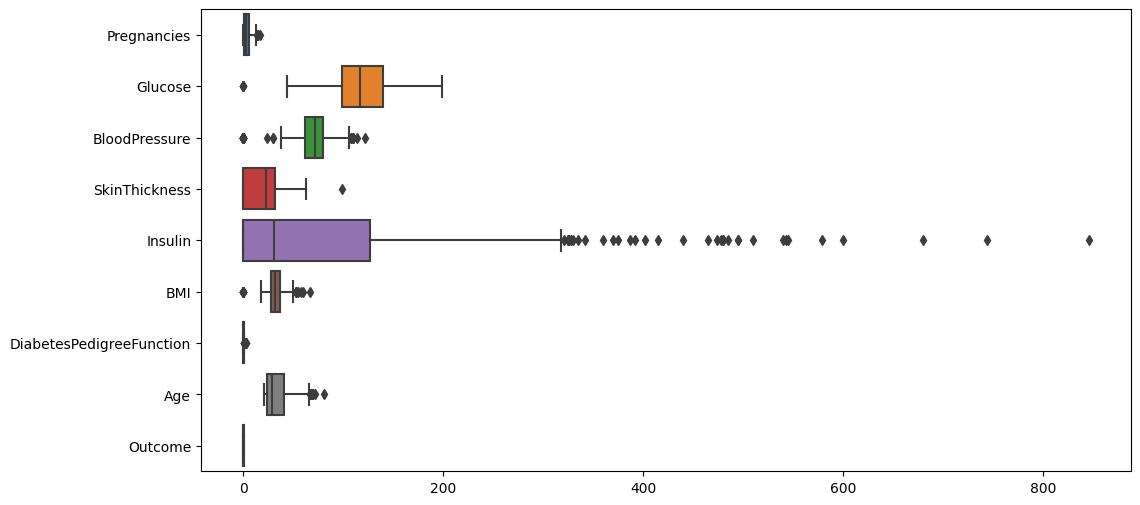

In [42]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.show()

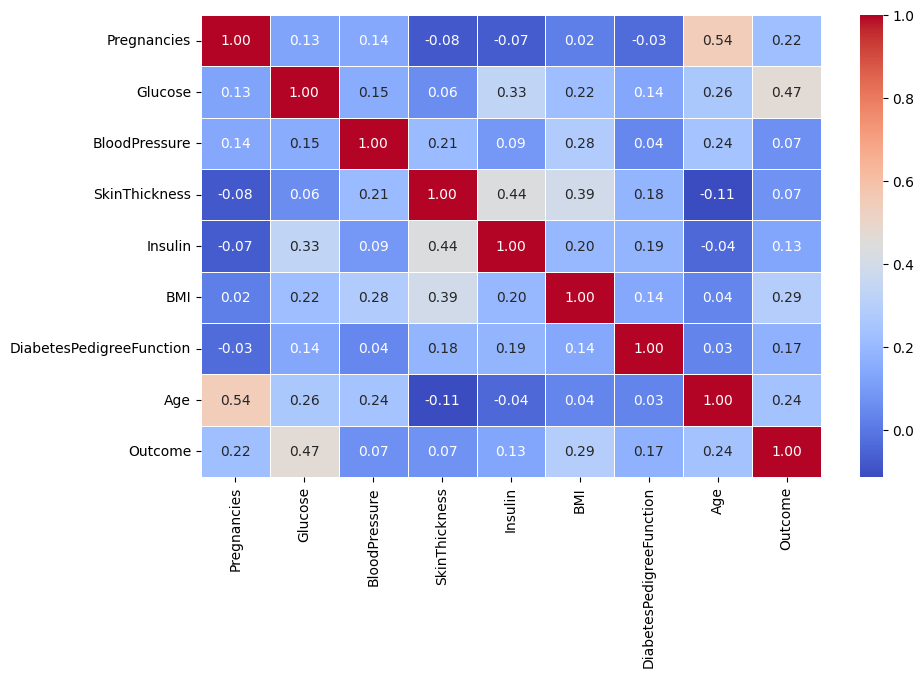

In [43]:
# ma trận tương quan giữa các biến
# gần 1 tuyến tính dương mạnh; gần -1 tuyến tính âm mạnh; gần 0 không có mối liên hệ.

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

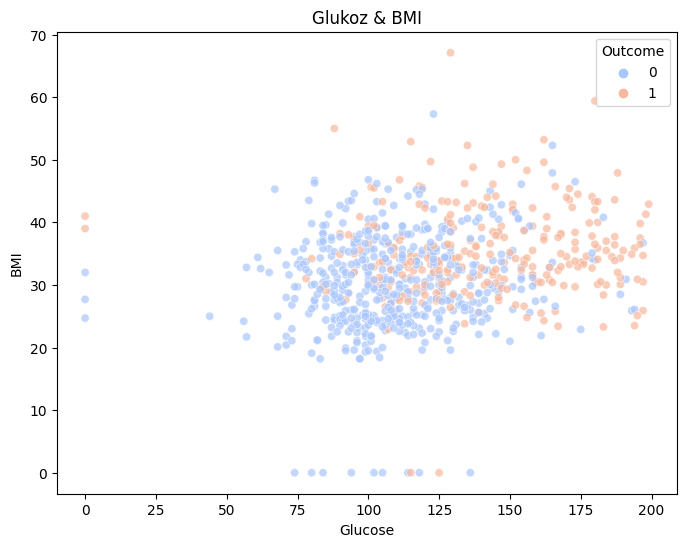

In [44]:
# Biều đò tán xạ mối quan hệ giữa Glucose và BMI và nhãn outcome (Có hoặc không).

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm", alpha=0.7)
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Glukoz & BMI")
plt.show()

In [45]:
# Phân chia dữ liệu; X là dữ liệu, y là nhãn

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [46]:
y.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [47]:
# chuẩn hóa dữ liệu min max => đưa về khoảng [0;1] => mô hình hội tụ nhanh hơn

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

scaled_X_df = pd.DataFrame(scaled_X)
scaled_X_df.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [48]:
# chia dữ liệu theo tỷ lệ 8-2:train-test

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, 
                                                                random_state = 9)

In [49]:
print(y_train.shape)
print(y_test.shape)

(614,)
(154,)


In [30]:
# Chuyển dữ liệu thành DataFrame để dễ lưu
train_data = pd.DataFrame(X_train)
train_data["Outcome"] = y_train  # Thêm nhãn vào cuối

test_data = pd.DataFrame(X_test)
test_data["Outcome"] = y_test  # Thêm nhãn vào cuối

# Lưu vào file CSV
train_data.to_csv("/kaggle/working/train_data.csv", index=False)
test_data.to_csv("/kaggle/working/test_data.csv", index=False)

print("Dữ liệu đã được lưu thành công!")

Dữ liệu đã được lưu thành công!


In [31]:
# Đọc dữ liệu từ file
train_data = pd.read_csv("/kaggle/working/train_data.csv")
test_data = pd.read_csv("/kaggle/working/test_data.csv")

# Tách X và y
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]

X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]

print("Dữ liệu đã được tải lại!")


Dữ liệu đã được tải lại!


In [50]:
print(y_train.head())
print(y_test.shape)

476    1
448    1
518    0
221    1
453    0
Name: Outcome, dtype: int64
(154,)


## Xây dựng 5 mô hình

### 🚀 Mô hình 1: KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình kNN với k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của kNN: {accuracy:.4f}")


Độ chính xác của kNN: 0.6818


#### Thử độ chính xác với nhiều K xem sao

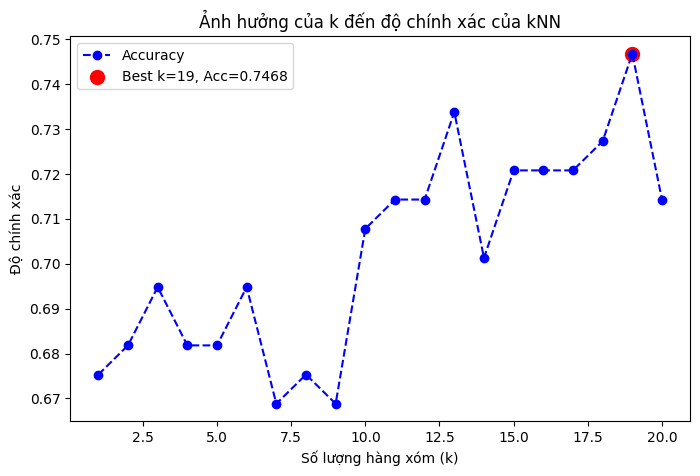

Giá trị k tốt nhất: 19 với độ chính xác 0.7468


In [53]:
k_values = range(1, 21)
accuracies = []

# Chạy mô hình với nhiều giá trị k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Tìm giá trị k có độ chính xác cao nhất
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b', label="Accuracy")

# Đánh dấu điểm cao nhất
plt.scatter(best_k, best_accuracy, color='red', s=100, label=f"Best k={best_k}, Acc={best_accuracy:.4f}")

plt.xlabel("Số lượng hàng xóm (k)")
plt.ylabel("Độ chính xác")
plt.title("Ảnh hưởng của k đến độ chính xác của kNN")
plt.legend()
plt.show()

print(f"Giá trị k tốt nhất: {best_k} với độ chính xác {best_accuracy:.4f}")

#### Nhận thấy rằng với k=19 thì mô hình đạt được độ chính xác cao nhất. Lưu mô hình với tham số k=19.

In [80]:
import joblib

# Huấn luyện lại mô hình với k tốt nhất
best_knn = KNeighborsClassifier(n_neighbors=19)
best_knn.fit(X_train, y_train)

# Lưu mô hình vào file
joblib.dump(best_knn, "/kaggle/working/knn_model_k19.pkl")

print("✅ Đã lưu mô hình kNN với k=19!")


✅ Đã lưu mô hình kNN với k=19!


### 🚀 Mô hình thứ hai: Support Vector Machine (SVM) với Kernel tuyến tính

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM với kernel tuyến tính
svm_linear = SVC(kernel='linear')

# Huấn luyện mô hình
svm_linear.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = svm_linear.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của SVM (Linear Kernel): {accuracy:.4f}")


Độ chính xác của SVM (Linear Kernel): 0.7597


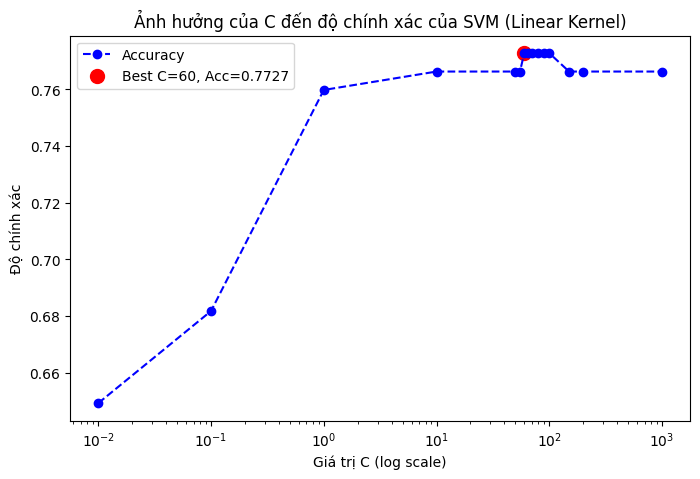

Giá trị C tốt nhất: 60 với độ chính xác 0.7727


In [61]:
# Thử nghiệm với tham số C (mức phạt đối với phân loại sai. C nhỏ có thể làm mô hình tổng quát nhưng độ chính xác giảm).

C_values = [0.01, 0.1, 1, 10, 50, 55, 60, 65, 70, 80, 90, 100, 150, 200, 1000]
accuracies = []

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Tìm giá trị C tốt nhất
best_C = C_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xscale("log")  # Hiển thị C theo thang logarit

# Đánh dấu điểm có độ chính xác cao nhất
plt.scatter(best_C, best_accuracy, color='red', s=100, label=f"Best C={best_C}, Acc={best_accuracy:.4f}")

plt.xlabel("Giá trị C (log scale)")
plt.ylabel("Độ chính xác")
plt.title("Ảnh hưởng của C đến độ chính xác của SVM (Linear Kernel)")
plt.legend()
plt.show()

print(f"Giá trị C tốt nhất: {best_C} với độ chính xác {best_accuracy:.4f}")


#### Lưu mô hình với C = 60

In [81]:
import joblib

# Huấn luyện lại mô hình với C tốt nhất
best_svm_linear = SVC(kernel='linear', C=60)
best_svm_linear.fit(X_train, y_train)

# Lưu mô hình vào file
joblib.dump(best_svm_linear, "/kaggle/working/svm_linear_C60.pkl")

print("✅ Đã lưu mô hình SVM (Linear Kernel) với C=60!")

✅ Đã lưu mô hình SVM (Linear Kernel) với C=60!


### 🚀 Mô hình thứ ba: SVM với Kernel RBF (Gaussian)

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM với Kernel RBF
svm_rbf = SVC(kernel='rbf')

# Huấn luyện mô hình
svm_rbf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = svm_rbf.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của SVM (RBF Kernel): {accuracy:.4f}")


Độ chính xác của SVM (RBF Kernel): 0.7532


#### Điều chỉnh tham số C và gamma
* C: mức phạt lỗi sai tương tự kernel tuyến tính
* gamma: ảnh hưởng của một điểm dữ liệu đến quyết định phân loại (giá trị thấp = phạm vi ảnh hưởng rộng, giá trị cao = phạm vi ảnh hưởng nhỏ).

In [67]:
C_values = [0.1, 1, 10, 50, 55, 60, 100, 1000]
gamma_values = [0.001, 0.01, 0.1, 1, 10]
best_acc = 0
best_C, best_gamma = None, None

# Duyệt qua tất cả cặp giá trị C và gamma
for C in C_values:
    for gamma in gamma_values:
        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_rbf.fit(X_train, y_train)
        y_pred = svm_rbf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        if acc > best_acc:
            best_acc = acc
            best_C, best_gamma = C, gamma

print(f"Giá trị C tối ưu: {best_C}, Gamma tối ưu: {best_gamma}, Độ chính xác cao nhất: {best_acc:.4f}")


Giá trị C tối ưu: 55, Gamma tối ưu: 1, Độ chính xác cao nhất: 0.7662


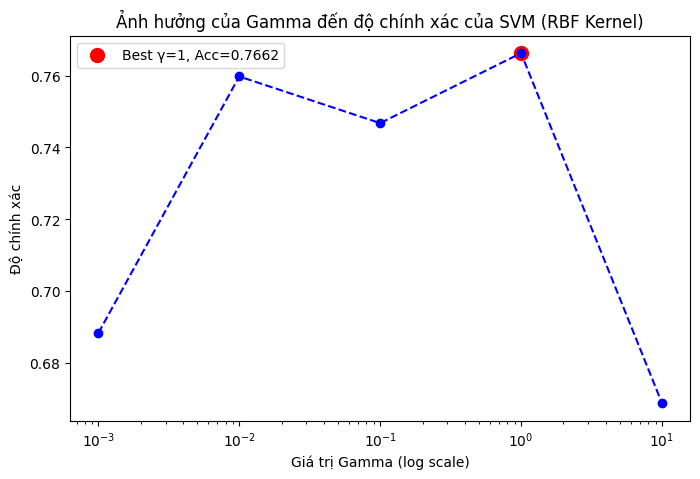

In [68]:
accuracies = []
for gamma in gamma_values:
    svm_rbf = SVC(kernel='rbf', C=best_C, gamma=gamma)
    svm_rbf.fit(X_train, y_train)
    y_pred = svm_rbf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(gamma_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xscale("log")  # Hiển thị gamma theo thang logarit

# Đánh dấu điểm cao nhất
plt.scatter(best_gamma, max(accuracies), color='red', s=100, label=f"Best γ={best_gamma}, Acc={best_acc:.4f}")

plt.xlabel("Giá trị Gamma (log scale)")
plt.ylabel("Độ chính xác")
plt.title("Ảnh hưởng của Gamma đến độ chính xác của SVM (RBF Kernel)")
plt.legend()
plt.show()


In [82]:
import joblib

# Huấn luyện lại mô hình với C và gamma tốt nhất
best_svm_rbf = SVC(kernel='rbf', C=55, gamma=1)
best_svm_rbf.fit(X_train, y_train)

# Lưu mô hình vào file
joblib.dump(best_svm_rbf, "/kaggle/working/svm_rbf_C55_G1.pkl")

print("✅ Đã lưu mô hình SVM (RBF Kernel) với C=55, Gamma=1!")

✅ Đã lưu mô hình SVM (RBF Kernel) với C=55, Gamma=1!


### 🚀 Mô hình thứ tư: Hồi quy Logistic (Logistic Regression)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=500)

# Huấn luyện mô hình
log_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = log_reg.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của Logistic Regression: {accuracy:.4f}")

Độ chính xác của Logistic Regression: 0.7597


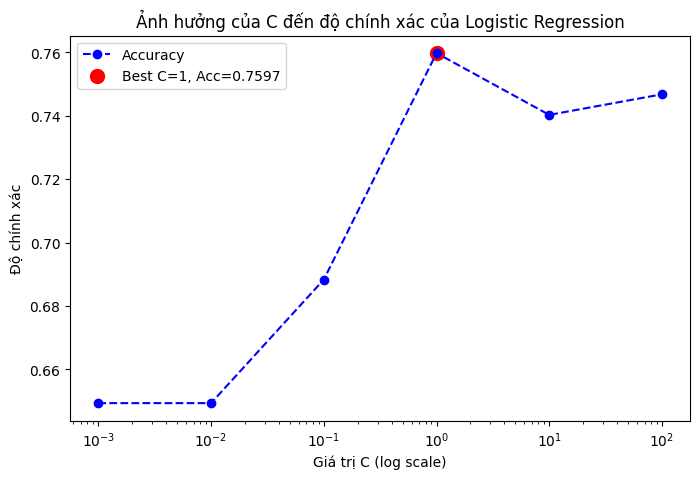

Giá trị C tốt nhất: 1 với độ chính xác 0.7597


In [70]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    log_reg = LogisticRegression(C=C, max_iter=500)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Tìm giá trị C tốt nhất
best_C = C_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xscale("log")  # Hiển thị C theo thang logarit

# Đánh dấu điểm có độ chính xác cao nhất
plt.scatter(best_C, best_accuracy, color='red', s=100, label=f"Best C={best_C}, Acc={best_accuracy:.4f}")

plt.xlabel("Giá trị C (log scale)")
plt.ylabel("Độ chính xác")
plt.title("Ảnh hưởng của C đến độ chính xác của Logistic Regression")
plt.legend()
plt.show()

print(f"Giá trị C tốt nhất: {best_C} với độ chính xác {best_accuracy:.4f}")


In [83]:
# Lưu mô hình với C=1

import joblib

# Huấn luyện lại mô hình với C tốt nhất
best_log_reg = LogisticRegression(C=1, max_iter=500)
best_log_reg.fit(X_train, y_train)

# Lưu mô hình vào file
joblib.dump(best_log_reg, "/kaggle/working/logistic_reg_C1.pkl")

print("✅ Đã lưu mô hình Logistic Regression với C=1!")

✅ Đã lưu mô hình Logistic Regression với C=1!


### 🚀 Mô hình thứ 5: Deep Learning (>5 Layers)

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Chuyển đổi y_train và y_test sang dạng one-hot encoding
y_train_oh = to_categorical(y_train, 2)
y_test_oh = to_categorical(y_test, 2)

# Khởi tạo mô hình Sequential
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Giảm overfitting
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')  # 2 lớp output cho 2 nhãn
])

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train_oh, validation_data=(X_test, y_test_oh), epochs=50, batch_size=16)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.5398 - loss: 0.6818 - val_accuracy: 0.6494 - val_loss: 0.6432
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - loss: 0.6409 - val_accuracy: 0.6558 - val_loss: 0.6021
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.5997 - val_accuracy: 0.6494 - val_loss: 0.6138
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7170 - loss: 0.5731 - val_accuracy: 0.7143 - val_loss: 0.5596
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5193 - val_accuracy: 0.7338 - val_loss: 0.5429
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: 0.5245 - val_accuracy: 0.7403 - val_loss: 0.5373
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.4981 - val_accuracy: 0.6753 - val_loss: 0.6555
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.5420 - val_accuracy: 0.7468 - val_los

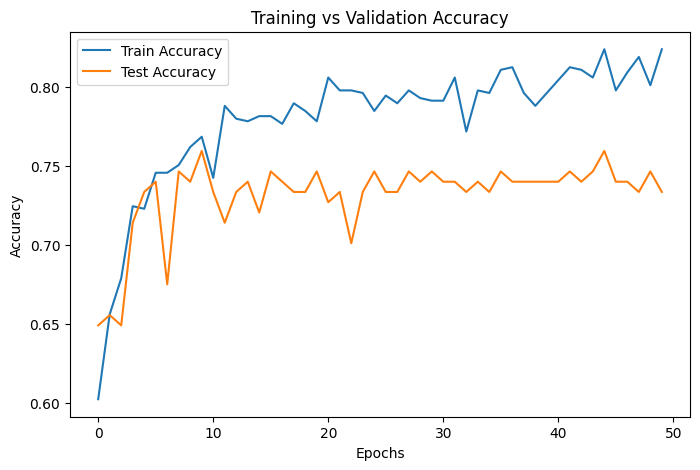

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


In [73]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Lấy class có xác suất cao nhất

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Độ chính xác của mô hình Deep Learning: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Độ chính xác của mô hình Deep Learning: 0.7338


#### Thử cải thiện mô hình bằng cách thêm lớp, thêm nút mỗi lớp, thêm Batch Normalization, giảm learnign_rate

In [77]:
# Xây dựng mô hình mới với ReLU và loss binary_crossentropy
model_v3 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')  # Chỉ 1 output neuron
])

# Compile mô hình với binary_crossentropy
model_v3.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình với 50 epochs
history_v3 = model_v3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.6391 - loss: 0.6770 - val_accuracy: 0.6494 - val_loss: 0.6536
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.6521 - val_accuracy: 0.6494 - val_loss: 0.6390
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 0.6348 - val_accuracy: 0.6494 - val_loss: 0.6163
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 0.6408 - val_accuracy: 0.6494 - val_loss: 0.5976
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.6127 - val_accuracy: 0.7338 - val_loss: 0.5695
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.5720 - val_accuracy: 0.7143 - val_loss: 0.5641
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.5761 - val_accuracy: 0.7403 - val_loss: 0.5555
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: 0.5641 - val_accuracy: 0.7273 - val_loss

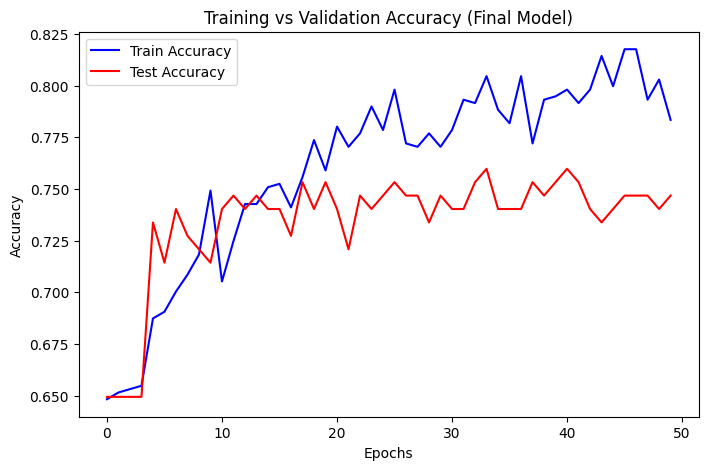

In [78]:
plt.figure(figsize=(8, 5))
plt.plot(history_v3.history['accuracy'], label='Train Accuracy', color='b')
plt.plot(history_v3.history['val_accuracy'], label='Test Accuracy', color='r')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Final Model)")
plt.legend()
plt.show()


In [79]:
# Dự đoán trên tập kiểm tra
y_pred_v3 = model_v3.predict(X_test)
y_pred_classes_v3 = (y_pred_v3 > 0.5).astype(int)  # Chuyển sigmoid output về 0 hoặc 1

# Đánh giá độ chính xác
accuracy_v3 = accuracy_score(y_test, y_pred_classes_v3)
print(f"Độ chính xác của mô hình Deep Learning tối ưu: {accuracy_v3:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Độ chính xác của mô hình Deep Learning tối ưu: 0.7468


In [84]:
# lưu mô hình thứ 5

# Lưu mô hình vào file
model_v3.save("/kaggle/working/deep_learning_model.h5")

print("✅ Đã lưu mô hình Deep Learning thành công!")


✅ Đã lưu mô hình Deep Learning thành công!


In [1]:
import sklearn
print(sklearn.__version__)  # Nên >= 1.3.0

1.2.2


In [2]:
import tensorflow
print(tensorflow.__version__)

2.17.1


In [3]:
!python --version

Python 3.10.12
